In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1: The amount of wheat on a 2x2 chessboard
def create_2x2_chessboard():
    # Create a 2x2 chessboard with the sequence 1, 2, 4, 8
    small_board_list = [1]
    for _ in range(4 - 1):  # 2x2 = 4 squares
        small_board_list.append(2 * small_board_list[-1])
    
    # Convert to ndarray and reshape to 2x2
    chessboard_2x2 = np.array(small_board_list).reshape(2, 2)
    
    return chessboard_2x2

In [2]:
# Question 2: Function to create an nxm chessboard using list method
def create_chessboard_list_method(n, m):
    """
    Create an nxm chessboard with wheat placement using list method
    
    Parameters:
    -----------
    n: int
        Number of rows
    m: int
        Number of columns
        
    Returns:
    --------
    chessboard: ndarray
        nxm array with wheat values
    """
    # Total number of squares
    total_squares = n * m
    
    # Create a list with doubling values
    wheat_list = [1]
    for _ in range(total_squares - 1):
        wheat_list.append(2 * wheat_list[-1])
    
    # Convert to ndarray and reshape to nxm
    chessboard = np.array(wheat_list, dtype=np.uint64).reshape(n, m)
    
    return chessboard


In [3]:
# Question 6: Function using np.append() method
def create_chessboard_append_method(n, m):
    """
    Create an nxm chessboard with wheat placement using np.append() method
    
    Parameters:
    -----------
    n: int
        Number of rows
    m: int
        Number of columns
        
    Returns:
    --------
    chessboard: ndarray
        nxm array with wheat values
    """
    # Total number of squares
    total_squares = n * m
    
    # Create an ndarray and append values
    wheat_array = np.array([1], dtype=np.uint64)
    for _ in range(total_squares - 1):
        wheat_array = np.append(wheat_array, 2 * wheat_array[-1])
    
    # Reshape to nxm
    chessboard = wheat_array.reshape(n, m)
    
    return chessboard

In [4]:
# Question 6: Function using broadcasting method
def create_chessboard_broadcast_method(n, m):
    """
    Create an nxm chessboard with wheat placement using broadcasting
    
    Parameters:
    -----------
    n: int
        Number of rows
    m: int
        Number of columns
        
    Returns:
    --------
    chessboard: ndarray
        nxm array with wheat values
    """
    # Total number of squares
    total_squares = n * m
    
    # Create indices and calculate powers of 2 using broadcasting
    indices = np.arange(total_squares, dtype=np.uint64)
    wheat_array = 2 ** indices
    
    # Reshape to nxm
    chessboard = wheat_array.reshape(n, m)
    
    return chessboard


In [5]:
# Solutions to all questions

In [6]:
# Question 1: 2x2 chessboard
chessboard_2x2 = create_2x2_chessboard()
print("\nQuestion 1: 2x2 Chessboard")
print(chessboard_2x2)
print(f"Total wheat on 2x2 chessboard: {np.sum(chessboard_2x2)}")


Question 1: 2x2 Chessboard
[[1 2]
 [4 8]]
Total wheat on 2x2 chessboard: 15


In [7]:
# Question 2 & 3: 8x8 chessboard and total wheat
chessboard_8x8 = create_chessboard_list_method(8, 8)
print("\nQuestion 2 & 3: 8x8 Chessboard (first few rows and columns)")
print(chessboard_8x8[:3, :3])  # Just showing a small portion as the full board has very large numbers
print(f"Total wheat on 8x8 chessboard: {np.sum(chessboard_8x8)}")


Question 2 & 3: 8x8 Chessboard (first few rows and columns)
[[     1      2      4]
 [   256    512   1024]
 [ 65536 131072 262144]]
Total wheat on 8x8 chessboard: 18446744073709551615



Average wheat per column:
[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


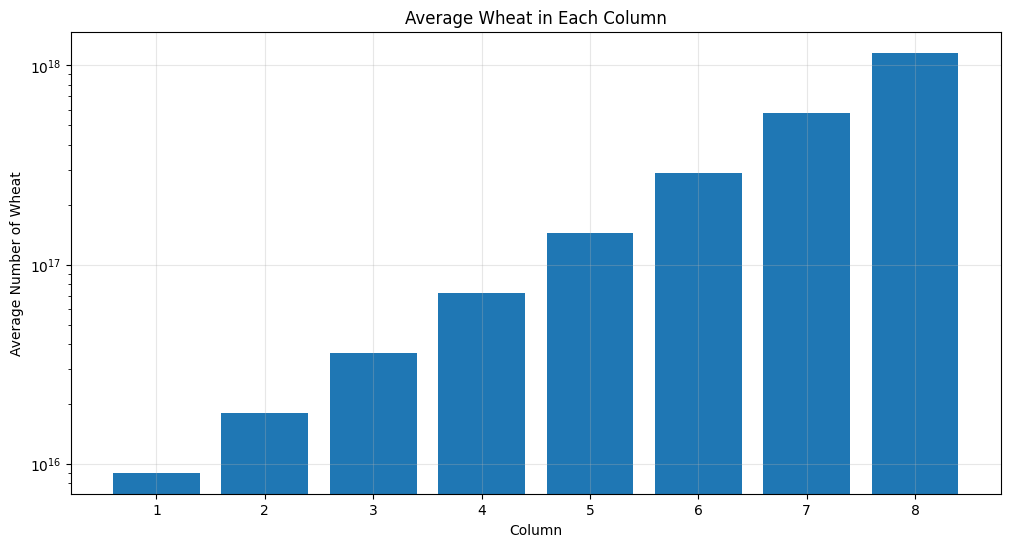

In [8]:
# Question 3: Average of each column and bar graph
column_averages = np.mean(chessboard_8x8, axis=0)
print("\nAverage wheat per column:")
print(column_averages)

plt.figure(figsize=(12, 6))
plt.xlabel("Column")
plt.ylabel("Average Number of Wheat")
plt.title("Average Wheat in Each Column")
plt.bar(np.arange(1, 9), column_averages)
plt.yscale('log')  # Use log scale due to exponential growth
plt.grid(True, alpha=0.3)
plt.savefig('wheat_column_averages.png')

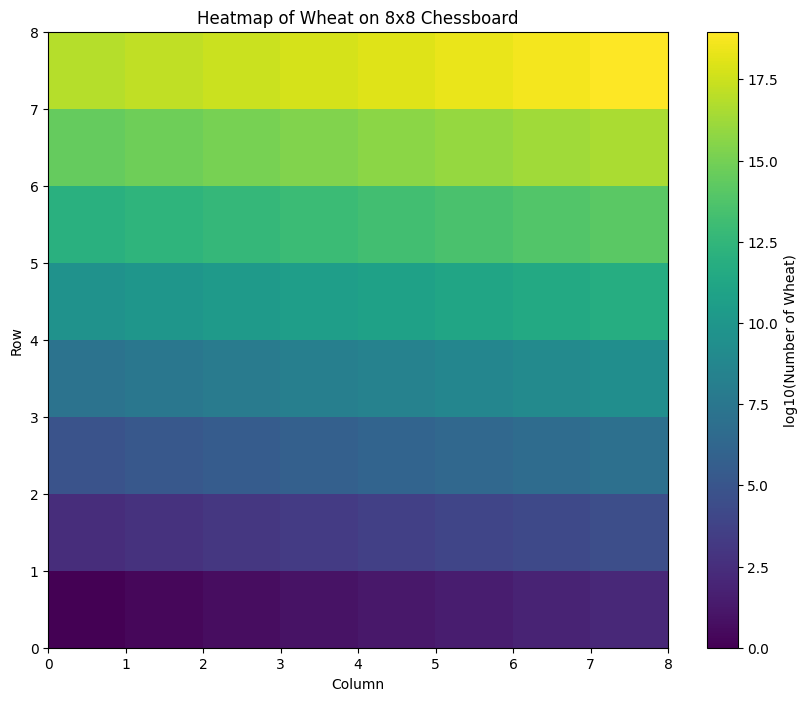

In [9]:
# Question 4: Heatmap of wheat counts
plt.figure(figsize=(10, 8))
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of Wheat on 8x8 Chessboard")
heatmap = plt.pcolor(np.log10(chessboard_8x8))  
plt.colorbar(heatmap, label='log10(Number of Wheat)')
plt.savefig('wheat_heatmap.png')


In [10]:
# Question 5: Compare first half vs second half
first_half = chessboard_8x8[:4, :]
second_half = chessboard_8x8[4:, :]
first_half_total = np.sum(first_half)
second_half_total = np.sum(second_half)
ratio = second_half_total / first_half_total

print("\nQuestion 5: First Half vs Second Half")
print(f"Total wheat in first half: {first_half_total}")
print(f"Total wheat in second half: {second_half_total}")
print(f"Second half is {ratio} times larger than first half")


Question 5: First Half vs Second Half
Total wheat in first half: 4294967295
Total wheat in second half: 18446744069414584320
Second half is 4294967296.0 times larger than first half


In [11]:
# Question 6: Create 8x8 chessboard using other methods
chessboard_append = create_chessboard_append_method(8, 8)
chessboard_broadcast = create_chessboard_broadcast_method(8, 8)

print("\nQuestion 6: Verify different methods produce same result")
print(f"List method total: {np.sum(chessboard_8x8)}")
print(f"Append method total: {np.sum(chessboard_append)}")
print(f"Broadcast method total: {np.sum(chessboard_broadcast)}")


Question 6: Verify different methods produce same result
List method total: 18446744073709551615
Append method total: 1.8446744073709552e+19
Broadcast method total: 18446744073709551615


In [12]:
# Question 7: For timing comparison, use the following in Jupyter notebook:
"""
%%timeit
create_chessboard_list_method(8, 8)

%%timeit
create_chessboard_append_method(8, 8)

%%timeit
create_chessboard_broadcast_method(8, 8)
"""

# Alternative timing code for non-Jupyter environments
import time

def measure_time(func, n, m, iterations=10):
    total_time = 0
    for _ in range(iterations):
        start_time = time.time()
        func(n, m)
        end_time = time.time()
        total_time += (end_time - start_time)
    return total_time / iterations

print("\nQuestion 7: Timing Comparison")
list_time = measure_time(create_chessboard_list_method, 8, 8)
append_time = measure_time(create_chessboard_append_method, 8, 8)
broadcast_time = measure_time(create_chessboard_broadcast_method, 8, 8)

print(f"List method average time: {list_time:.6f} seconds")
print(f"Append method average time: {append_time:.6f} seconds")
print(f"Broadcast method average time: {broadcast_time:.6f} seconds")
print(f"Broadcast is {list_time/broadcast_time:.1f}x faster than list method")
print(f"Broadcast is {append_time/broadcast_time:.1f}x faster than append method")


Question 7: Timing Comparison
List method average time: 0.000100 seconds
Append method average time: 0.000603 seconds
Broadcast method average time: 0.000096 seconds
Broadcast is 1.0x faster than list method
Broadcast is 6.3x faster than append method
